In [2]:
import seaborn as sns
import pandas as pd
# !pip install missingno
import missingno as msno
import numpy as np
# from sklearn.preprocessing import OneHotEncoder

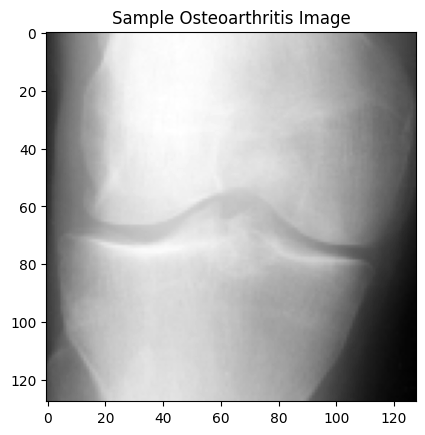

In [10]:
# 이미지 불러오기
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# !pip install opencv-python
import cv2

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 데이터 경로와 카테고리 설정
data_dir = '../z20_data/osteoarthritis/train'
categories = ['0','3','4']
img_size = 128

# 데이터 로드 및 시각화 함수
def load_and_visualize_data(data_dir, categories, img_size):
    input_data = []
    target_data = []
    for category in categories:
        category_path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img_name in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    input_data.append(img)
                    target_data.append(class_num)
                else:
                    print(f"Failed to load image {img_path}")
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    input_data = np.array(input_data).reshape(-1, img_size, img_size, 1)
    target_data = np.array(target_data)
    
    # 첫 번째 샘플 이미지 시각화
    if len(input_data) > 0:
        plt.imshow(input_data[0].reshape(img_size, img_size), cmap='gray')
        plt.title('Sample Osteoarthritis Image')
        plt.show()
    else:
        print("No images to display.")
    
    return input_data, target_data

# 함수 호출 및 데이터 로드
input_data, target_data = load_and_visualize_data(data_dir, categories, img_size)


# def load_data(data_dir):
#     images = []
#     # labels = []
#     for img_path in os.listdir(data_dir):
#         img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#         img = resize_image(img)
#         img = clahe_image(img)
#         img = normalize_img(img)
#         images.append(img)
        
#     prepared_datas = np.array(images)
#     return prepared_datas
            
# print(len(image_list),len(label_list))
# df = pd.DataFrame(data_dir)
# df.head()
        # if img is not None:
        #     plt.imshow(img, cmap='gray')
        #     plt.title(f'{category} 0')
        #     plt.imshow
        # else:
        #     print(f'Error loading image: {img_path}')

In [ ]:
auto_test_input, auto_test_target = load_and_visualize_data(os.path.join(data_dir,'auto_test'),categories,img_size)
test_input, test_target = load_and_visualize_data(os.path.join(data_dir,'test'),categories,img_size)
train_input, train_target = load_and_visualize_data(os.path.join(data_dir,'train'),categories,img_size)
val_input, val_target = load_and_visualize_data(os.path.join(data_dir,'val'),categories,img_size)

In [ ]:
def resize_image(img,size=(128,128)):
    return cv2.resize(img,size)
resized_img = resize_image(img)
plt.imshow(resized_img,cmap='gray')
plt.title('Resized Image')
plt.show()

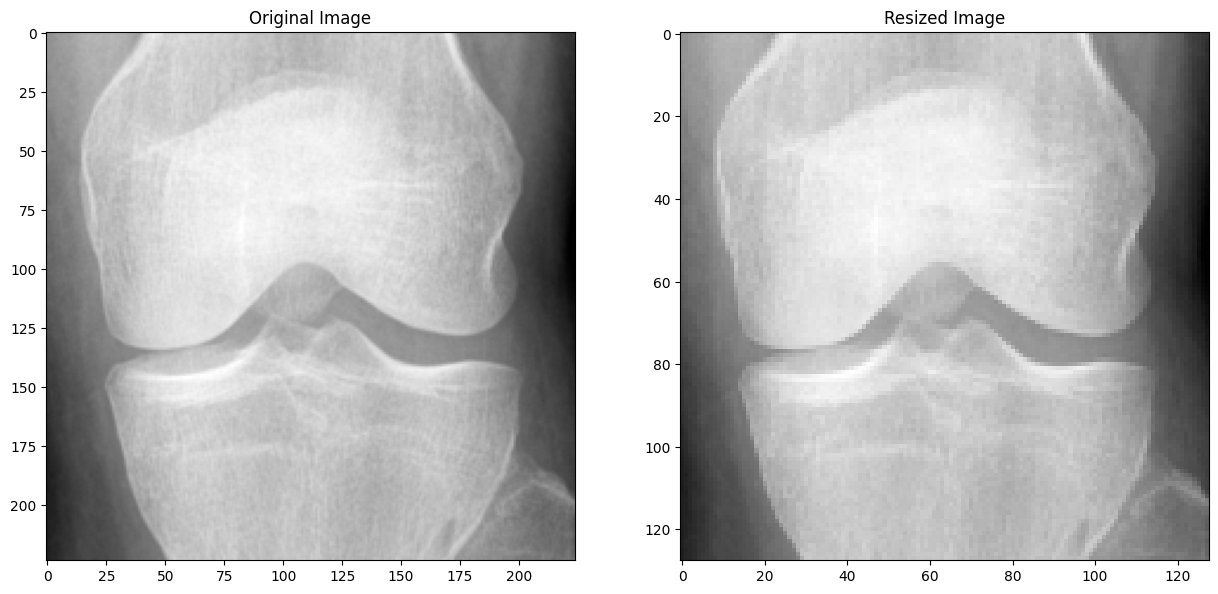

In [8]:
def resize_image(img,size=(128,128)):
    return cv2.resize(img,size)
resized_img = resize_image(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')
plt.show()

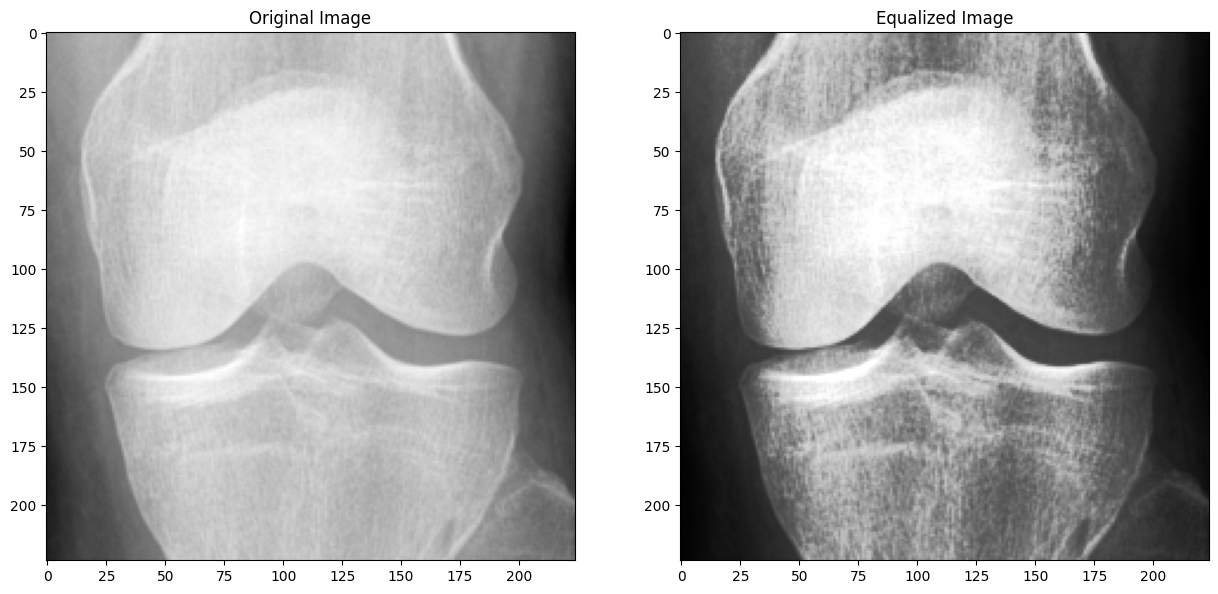

In [9]:
def he_img(img):
    return cv2.equalizeHist(img)

equalized_img = he_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

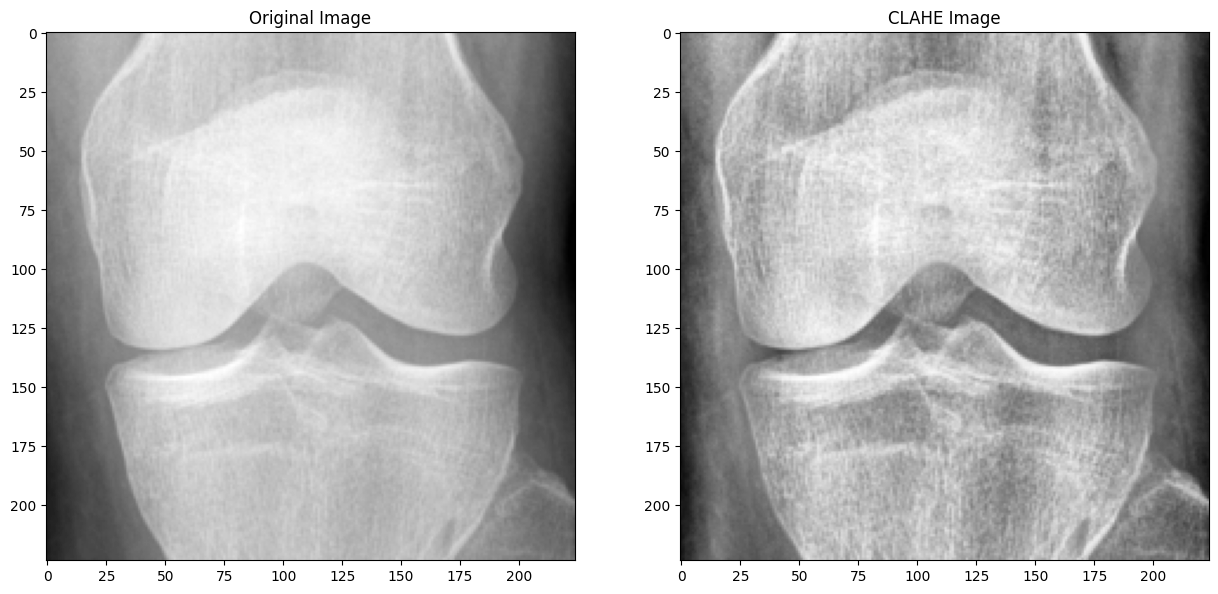

In [10]:
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(clahe_image(img), cmap='gray')
plt.title('CLAHE Image')
plt.show()

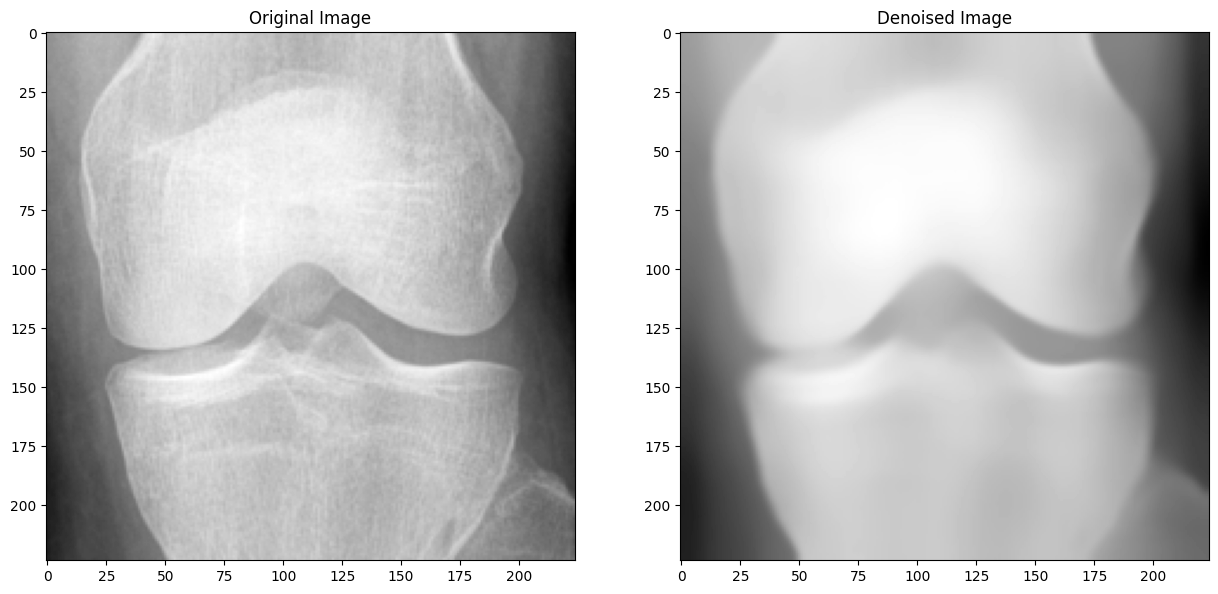

In [11]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img,None,30,7,21)

denoised_img = denoise_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

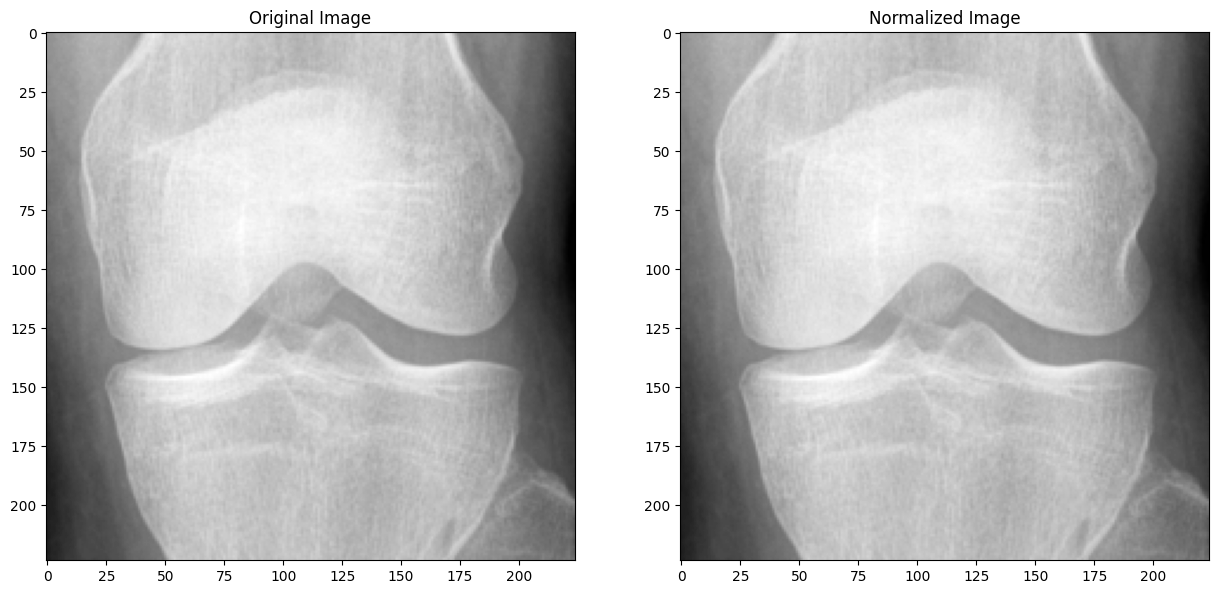

In [12]:
def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

normalized_img = normalize_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

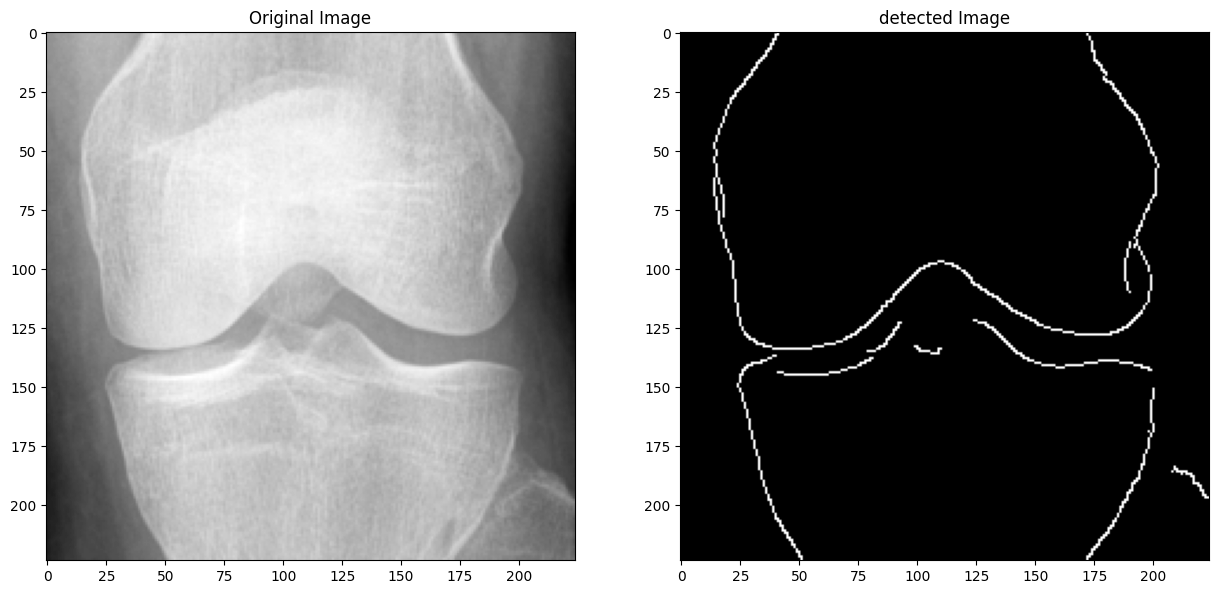

In [13]:
def detect_edge(img):
    return cv2.Canny(img,100,200)

detected_img = detect_edge(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('detected Image')
plt.show()

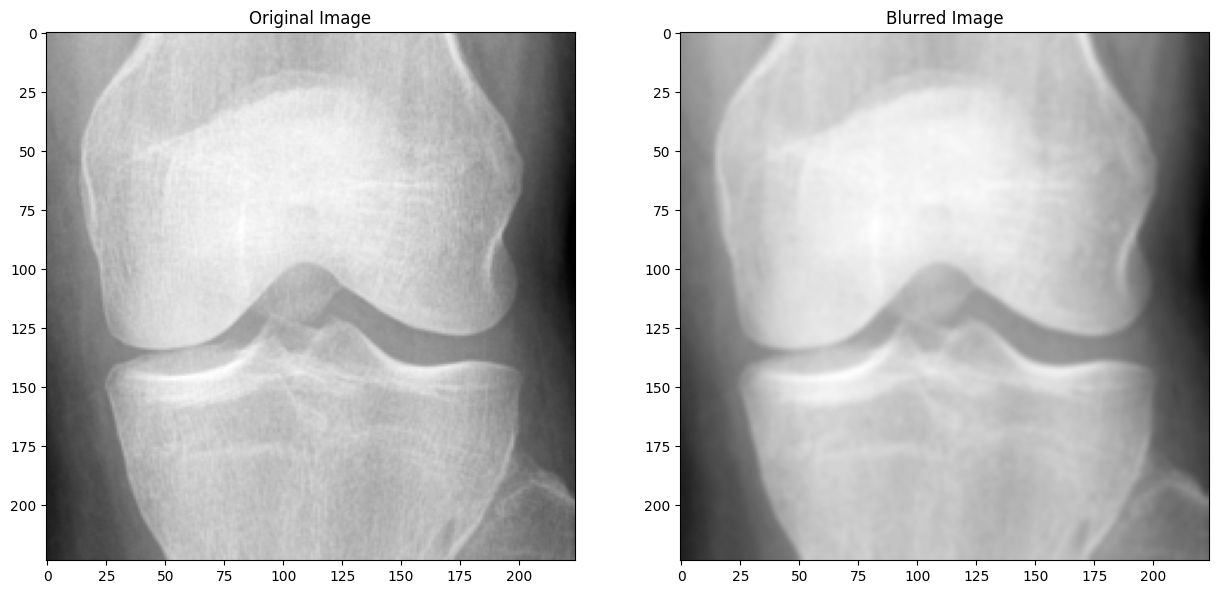

In [14]:
def blur_img(img):
    return cv2.GaussianBlur(img,(5,5),0)

blurred_img = blur_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()

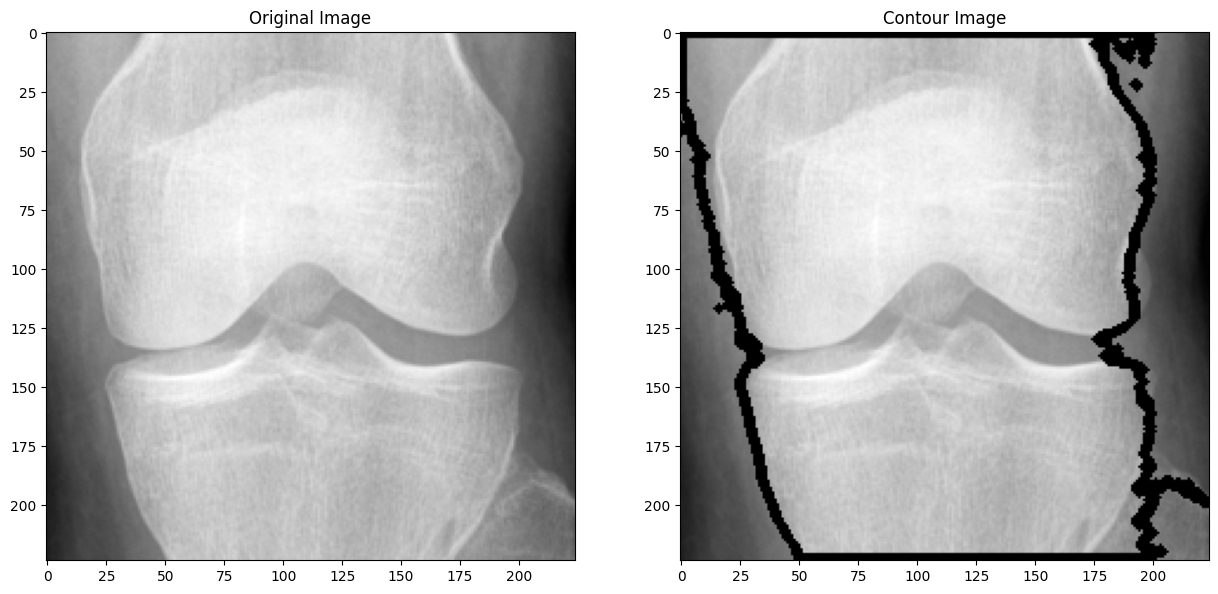

In [15]:
def find_contour(img):
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hiearchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(),contours,-1,(0,255,0),3)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()

In [ ]:
def load_data(data_dir):
    images = []